# Part I - Ford GoBike Data Exploration

## (by NIHARIKA JAIN)

##### Investigation Overview
In this final project, I chose Ford GoBike Dataset. This dataset includes more than 1,83,412 trips with 15 attributes such as locations, station names, bike ids, gender, and user attributes(Subscriber or Customer). There is start and end stations information as well. 
##### Dataset Overview
The Ford GoBike data consists of around 1,83,412 Bay Wheels trip data captured during Aug 2019. Dataset includes
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

## Table of Content

1. #### [Preliminary Wrangling](#wrangling)
1. #### [Univariate Exploration](#univariate)
1. #### [Bivariate Exploration](#bivariate)
1. #### [Multivariate Exploration](#multivariate)
1. #### [Conclusion](#conclusion)

# <a id="wrangling">Preliminary Wrangling </a> 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
%matplotlib inline

##### 1. Gathering & Assessing Data

In [2]:
fordgobike=pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
print('Data set Shape',fordgobike.shape)
print(fordgobike.dtypes)

Data set Shape (183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
fordgobike.duplicated().sum()

0

##### 3. Cleaning Data

In [8]:
fordgobike_copy=fordgobike.copy()
fordgobike_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [9]:
fordgobike_copy['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
fordgobike_copy['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
fordgobike_copy['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [12]:
print("Total no of null values in Start Station Id",fordgobike_copy['start_station_id'].isnull().sum())
print("Total no of null values in End Station Id",fordgobike_copy['end_station_id'].isnull().sum())
print("Total no of null values in Bike Id",fordgobike_copy['bike_id'].isnull().sum())

Total no of null values in Start Station Id 197
Total no of null values in End Station Id 197
Total no of null values in Bike Id 0


In [13]:
#issue1: Removing Null Values

fordgobike_copy = fordgobike_copy[fordgobike_copy['start_station_id'].isnull() == False]
fordgobike_copy = fordgobike_copy[fordgobike_copy['end_station_id'].isnull() == False]

In [14]:
print("Total no of null values in Start Station Id",fordgobike_copy['start_station_id'].isnull().sum())
print("Total no of null values in End Station Id",fordgobike_copy['end_station_id'].isnull().sum())
print("Total no of null values in Bike Id",fordgobike_copy['bike_id'].isnull().sum())

Total no of null values in Start Station Id 0
Total no of null values in End Station Id 0
Total no of null values in Bike Id 0


In [15]:
#issue2: Converting Start time and End Time Datatypes to DateTime

fordgobike_copy['start_time']=pd.to_datetime(fordgobike_copy['start_time'])
fordgobike_copy['end_time']=pd.to_datetime(fordgobike_copy['end_time'])

#Converting Start Station Id, End Station ID & Bake ids Datatypes to Int
fordgobike_copy['start_station_id']=fordgobike_copy['start_station_id'].astype(int)
fordgobike_copy['end_station_id']=fordgobike_copy['end_station_id'].astype(int)
fordgobike_copy['bike_id']=fordgobike_copy['bike_id'].astype(int)

#Converting Usertype and Member gender Datatypes to Categorical
fordgobike_copy['user_type']=fordgobike_copy['user_type'].astype('category')
fordgobike_copy['member_gender']=fordgobike_copy['member_gender'].astype('category')
fordgobike_copy['bike_share_for_all_trip']=fordgobike_copy['bike_share_for_all_trip'].astype('category')

In [16]:
fordgobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  int32         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  int32         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int32         
 12  user_type       

In [17]:
#issue3: create new columns to help in further analysis

fordgobike_copy['start_date'] = fordgobike_copy['start_time'].dt.strftime('%Y-%m-%d')

fordgobike_copy['month_of_trip'] = fordgobike_copy['start_time'].dt.strftime('%B')

fordgobike_copy['day_of_week']= fordgobike_copy['start_time'].dt.strftime('%A')

fordgobike_copy['trip_hour']= fordgobike_copy['start_time'].dt.hour

fordgobike_copy['trip_duration_minute'] = fordgobike_copy['duration_sec']/60

fordgobike_copy['start_time_day']=fordgobike_copy['start_time'].dt.day.astype(int)

In [18]:
fordgobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,month_of_trip,day_of_week,trip_hour,trip_duration_minute,start_time_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,February,Thursday,17,869.750000,28
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,2019-02-28,February,Thursday,18,708.683333,28
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,February,Thursday,12,1030.900000,28
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,February,Thursday,17,608.166667,28
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,February,Thursday,23,26.416667,28


In [19]:
print("New Data Set Shape",fordgobike_copy.shape)

New Data Set Shape (183215, 22)


In [20]:
fordgobike_copy['start_date'].value_counts()

2019-02-28    9821
2019-02-20    9651
2019-02-21    9527
2019-02-19    9453
2019-02-07    9230
2019-02-22    9193
2019-02-06    9052
2019-02-11    8664
2019-02-05    8484
2019-02-12    8466
2019-02-27    7706
2019-02-15    7288
2019-02-25    7025
2019-02-14    6598
2019-02-08    6352
2019-02-01    6129
2019-02-18    5627
2019-02-04    5491
2019-02-23    5435
2019-02-26    5378
2019-02-24    4490
2019-02-17    4223
2019-02-16    3992
2019-02-10    3950
2019-02-02    3229
2019-02-13    3200
2019-02-03    2840
2019-02-09    2721
Name: start_date, dtype: int64

In [21]:
fordgobike_copy['month_of_trip'].value_counts()

February    183215
Name: month_of_trip, dtype: int64

In [22]:
fordgobike_copy['day_of_week'].value_counts()

Thursday     35176
Tuesday      31781
Wednesday    29609
Friday       28962
Monday       26807
Sunday       15503
Saturday     15377
Name: day_of_week, dtype: int64

In [23]:
fordgobike_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'month_of_trip', 'day_of_week', 'trip_hour',
       'trip_duration_minute', 'start_time_day'],
      dtype='object')

### What is the structure of your dataset?

> There are 1,83,215(after cleaning up) bike rides data set of Feb 2019 with 22 features/columns (after adding the 7 more columns).
<br><br> 'duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip','start_date', 'month_of_trip', 'day_of_week', 'trip_hour','trip_duration_minute', 'start_time_day', 'weekday_or_weekend'

### What is/are the main feature(s) of interest in your dataset?

> I am exploring the following questions: 
> - Finding which day & what time has highest trips. 
> - Relationship between User-Type(Subscriber Vs. Customer), Gender(Female Vs. Male Vs. Other)
> - Relationship between usertypes and trip.
> - Relationship between gender and trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> This dataset does not contain lots of numeric values with start and end trip information such as Start & End Trip Date. I am extracting hour, date, day, trip duration in an hour, minute, and month information from start_time column for further analysis.

## <a id='univariate'>Univariate Exploration</a>

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [24]:
def counplot_graph(dataFrame, xAxis, basecolor, title, xLabel, yLabel, labelsize=10, titleSize=15,labelpad=10):
    '''
    This is the basic function for Count plots. 
    Our count plot grapgh will create after providing basic information such as dataFrame, xaxis, basecolor, title, xLabel, yLabel information.
    Labelsize, titleSize and labelpad default values already provided..
    '''
    sb.countplot(data=dataFrame, x=xAxis,color=basecolor)
    plt.title(title,fontsize=titleSize)
    plt.xlabel(xLabel,fontsize=labelsize,labelpad=labelpad)
    plt.ylabel(yLabel,fontsize=labelsize,labelpad=labelpad);

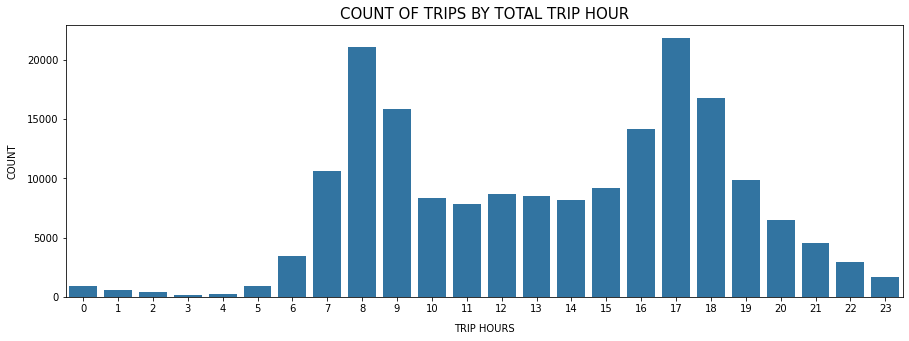

In [25]:
#figure1
plt.subplots(figsize = (15,5))
base_color=sb.color_palette()[0]

#using user-defined function for countplot grapgh
counplot_graph(fordgobike_copy,
               'trip_hour',
               base_color,
               'COUNT OF TRIPS BY TOTAL TRIP HOUR',
               'TRIP HOURS',
               'COUNT')

> __According to the above observation, most bikers like to ride at 8:00 a.m., followed by 5:00 - 6:00 p.m. It's probably because the majority of them choose to ride their bikes during work hours!__

In [26]:
fordgobike_copy['day_of_week'].value_counts()

Thursday     35176
Tuesday      31781
Wednesday    29609
Friday       28962
Monday       26807
Sunday       15503
Saturday     15377
Name: day_of_week, dtype: int64

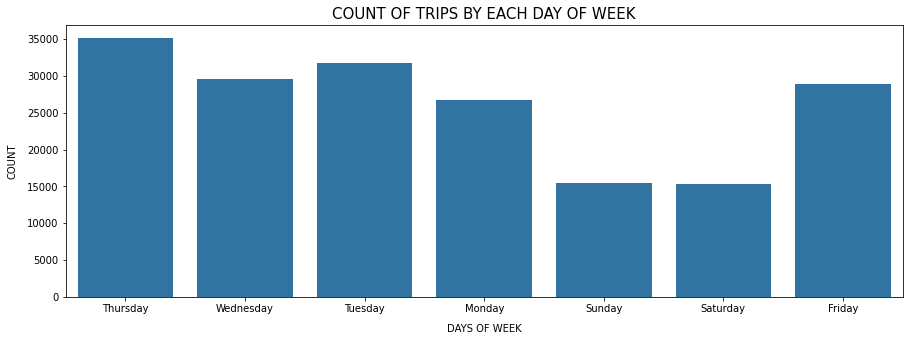

In [27]:
#figure2
plt.subplots(figsize = (15,5))

#using user-defined function for countplot grapgh
counplot_graph(fordgobike_copy,
               'day_of_week',
               base_color,
               'COUNT OF TRIPS BY EACH DAY OF WEEK',
               'DAYS OF WEEK',
               'COUNT')

> __Thursday has been the most popular day for bike rides, followed by Tuesday and Wednesday. Also, I can see that the days with the least number of bike rides were Sundays and Saturdays, with a roughly equal number of rides!__

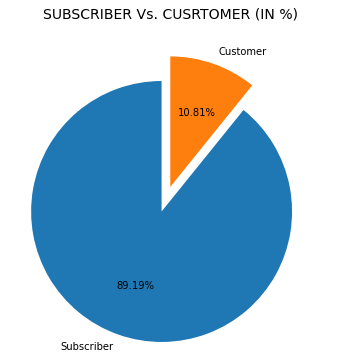

In [28]:
#figure3
plt.figure(figsize=[12,6])

usertype_counts = fordgobike_copy['user_type'].value_counts()

explodeTuple=(0.2,0)

plt.pie(usertype_counts,
        explode=explodeTuple,
        labels = usertype_counts.index, 
        autopct='%1.2f%%',
        startangle=90)

plt.title('SUBSCRIBER Vs. CUSRTOMER (IN %)', fontsize=14);

> __The subscribers to 'Ford GoBike' appear to use the service more frequently than customers. Customers account for only 10.18 percent of the market, while subscribers account for 89.19 percent.__

In [29]:
fordgobike_copy['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

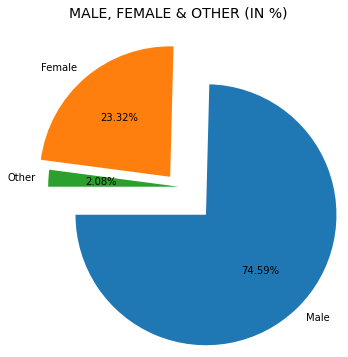

In [30]:
#figure4
plt.figure(figsize=[12,6])

gender_counts = fordgobike_copy['member_gender'].value_counts()

explodeTuple=(0.3,0.1,0)

plt.pie(gender_counts,
        labels = gender_counts.index,
        autopct='%1.2f%%',
        explode = explodeTuple,
        startangle   = 180)

plt.title('MALE, FEMALE & OTHER (IN %)', fontsize=14);

> __In comparison to the female bikers, males have been the most preferred bikers of the 'Ford GoBike' with 74.59 shares.__

In [31]:
fordgobike_copy['member_birth_year'].value_counts().head()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
Name: member_birth_year, dtype: int64

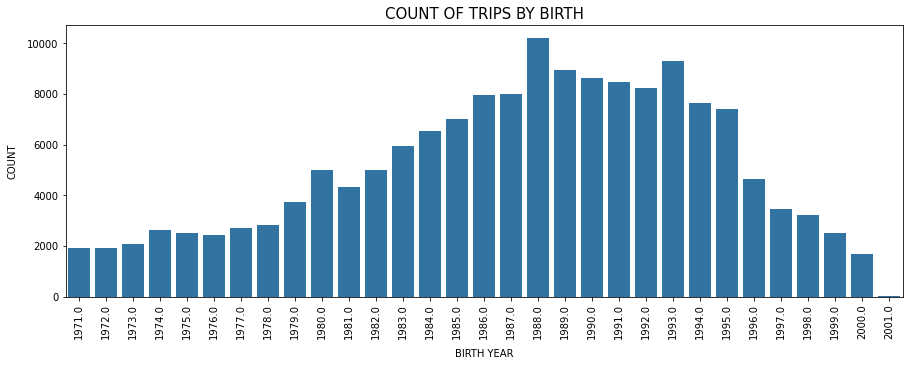

In [32]:
#figure6

plt.subplots(figsize = (15,5))

#Fetcing records only those members whose birth year is after 1970 
recentYears=fordgobike_copy.loc[(fordgobike_copy['member_birth_year']>1970)]

#using user-defined function for countplot grapgh
counplot_graph(recentYears,
               'member_birth_year',
               base_color,
               'COUNT OF TRIPS BY BIRTH',
               'BIRTH YEAR',
               'COUNT')

plt.xticks(rotation=90);


> __People born between 1988 and 1993 appear to be more interested in going on Ford GoBike rides than those born in the 1970s and after 1999.__

## <a id='bivariate'>Bivariate Exploration</a>

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [33]:
def plotformat(title, xlabel, ylabel, titleFontSize=15,labelSize=12, labelpad=16):
    '''
    This is the basic function to format plot Labels. 
    We need to provde basic information such as title, xlabel, ylablel for formatting plots. 
    TitleSize, labelsize and labelpad default values already provided.
    '''
    plt.title(title,fontsize=titleFontSize)
    plt.xlabel(xlabel, labelpad=labelpad,fontsize=labelSize)
    plt.ylabel(ylabel, labelpad=labelpad,fontsize=labelSize)

In [34]:
def plottext(ax,value):
    '''
    This is the basic function to plot text on graphs. 
    We need to provde which value we need to write on plot.
    '''
    for bar in ax.patches:
        height = bar.get_height()
        label_x_pos = bar.get_x() + bar.get_width() / 2
        ax.text(label_x_pos,height, s=value.format(height), ha='center',va='bottom')

In [35]:
#Fetching records after grouping of days of week and user type columns

per_bike=fordgobike_copy.groupby(['day_of_week','user_type']).size()

per_bike=per_bike.reset_index(name='count')

#creating new columns for % of bike rides 
per_bike['perc']=(per_bike['count']/per_bike['count'].sum())*100

per_bike.sample(2)

,day_of_week,user_type,count,perc
2,Monday,Customer,2726,1.487869
5,Saturday,Subscriber,12650,6.904457


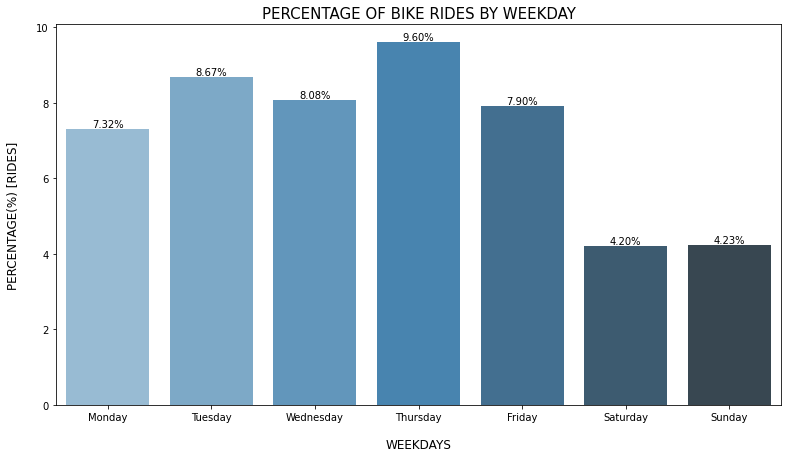

In [36]:
#figure7

plt.subplots(figsize = (13,7))

#plotting barplot graph 
ax=sb.barplot(data=per_bike,
              x='day_of_week', y='perc',
              palette="Blues_d",
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],
              ci=None)

#Using predefined functions to plot value and format title, labels

plottext(ax,'{:.2f}%')

plotformat('PERCENTAGE OF BIKE RIDES BY WEEKDAY', 'WEEKDAYS', 'PERCENTAGE(%) [RIDES]')

plt.show();

> __On weekdays, users ride their bikes significantly more than on weekends. Thursday had the highest percentage of riders (9.6%), followed by Tuesday and Wednesday.__

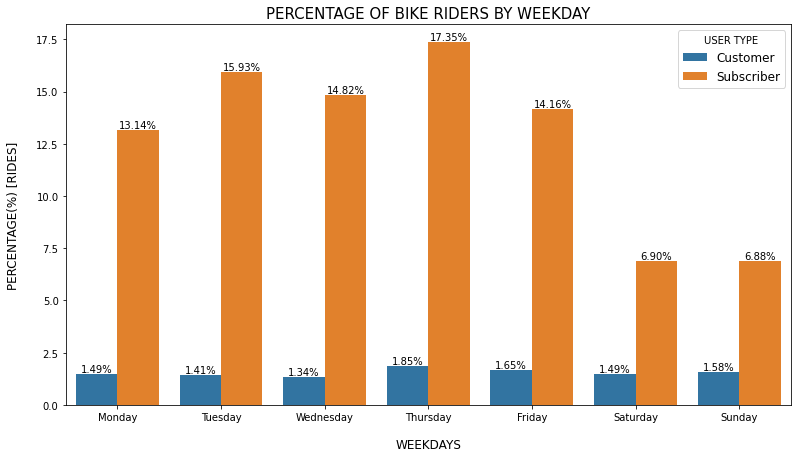

In [37]:
#figure8

plt.subplots(figsize = (13,7))

ax=sb.barplot(data=per_bike,
              x='day_of_week', y='perc', hue='user_type',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'],
              ci=None)

#Using predefined functions to plot value and format title,labels

plottext(ax,'{:.2f}%')

plotformat('PERCENTAGE OF BIKE RIDERS BY WEEKDAY', 'WEEKDAYS', 'PERCENTAGE(%) [RIDES]')

plt.legend(title='USER TYPE',loc='upper right',prop={"size":12});

> __According to the subscriber account, the majority of bikers enjoy Thursday rides. I just combined both analyses into a single graph.__

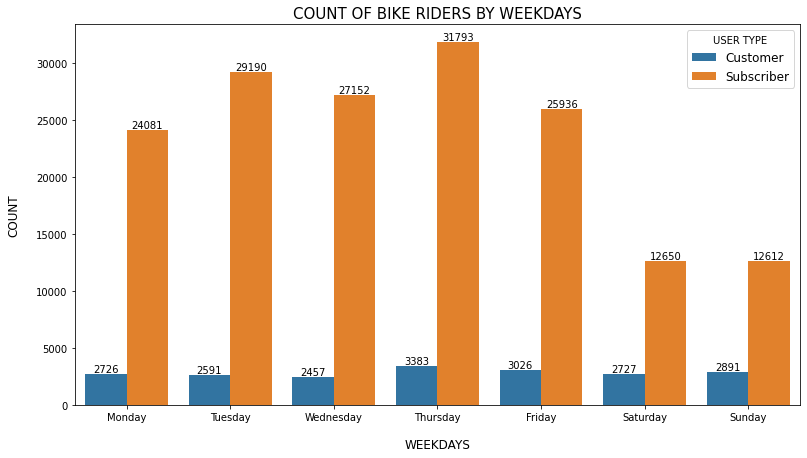

In [38]:
#figure9

plt.subplots(figsize = (13,7))

ax=sb.countplot(data=fordgobike_copy,
              x='day_of_week', hue='user_type',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

#Using predefined functions to plot value and format title,labels
plottext(ax,'{}')

plotformat('COUNT OF BIKE RIDERS BY WEEKDAYS', 'WEEKDAYS', 'COUNT')

plt.legend(title='USER TYPE',loc='upper right',prop={"size":12});

In [39]:
df_duration_time_weekday=fordgobike_copy.loc[:,('trip_duration_minute','user_type','member_gender')].groupby(['user_type','member_gender']).agg({'trip_duration_minute':'mean'}).reset_index()
df_duration_time_weekday

,user_type,member_gender,trip_duration_minute
0,Customer,Female,23.735468
1,Customer,Male,20.893225
2,Customer,Other,26.705000
3,Subscriber,Female,11.607134
4,Subscriber,Male,10.271101
5,Subscriber,Other,15.202909


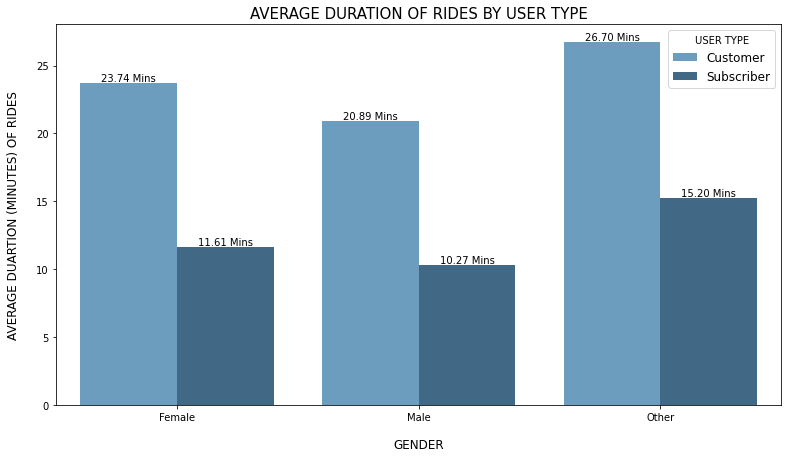

In [40]:
#figure10

plt.subplots(figsize = (13,7))

ax=sb.barplot(data=df_duration_time_weekday,
              x='member_gender',y='trip_duration_minute',hue='user_type',
              palette='Blues_d')

#Using predefined functions to plot value and format title,labels
plottext(ax,'{:.2f} Mins')

plotformat('AVERAGE DURATION OF RIDES BY USER TYPE', 'GENDER', 'AVERAGE DUARTION (MINUTES) OF RIDES')

plt.legend(title='USER TYPE',loc='upper right',prop={"size":12});

> __Male has more bike rides than female and other gender, according to earlier analysis, but average duration of other (gender type) has more rides in both user types, according to the above analyses.__

In [41]:
#Adding one more columns for weekday and weekend.
#Sat & Sun will be added as Weekend. All other values added as Weekeday.
fordgobike_copy['weekday_or_weekend']=fordgobike_copy['day_of_week'].apply(lambda x: "weekend" if (x =='Saturday' or x =='Sunday') else "weekday")

df_trip_hour_weekday=fordgobike_copy.loc[:,('trip_hour','bike_share_for_all_trip','weekday_or_weekend')].groupby(['bike_share_for_all_trip','weekday_or_weekend']).agg({'trip_hour':'sum'}).reset_index()
df_trip_hour_weekday

,bike_share_for_all_trip,weekday_or_weekend,trip_hour
0,No,weekday,1847986
1,No,weekend,372559
2,Yes,weekday,188042
3,Yes,weekend,57160


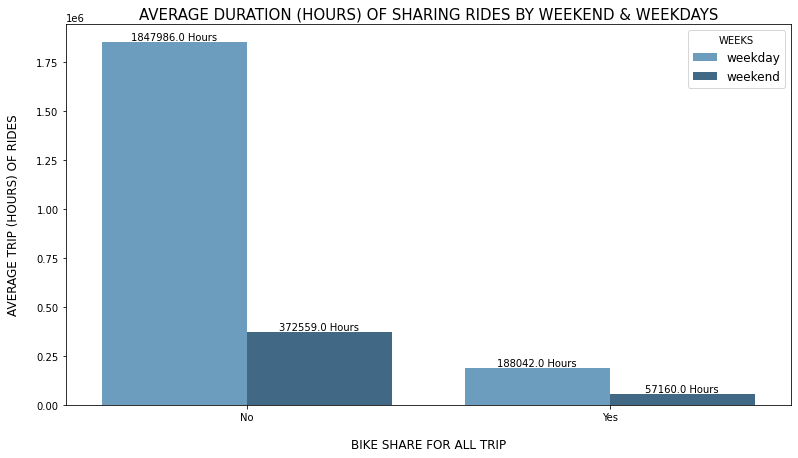

In [42]:
#figure11

plt.subplots(figsize = (13,7))

ax=sb.barplot(data=df_trip_hour_weekday,
              x='bike_share_for_all_trip',y='trip_hour',hue='weekday_or_weekend',
              palette='Blues_d')

#Using predefined functions to plot value and format title,labels
plottext(ax,'{} Hours')

plotformat('AVERAGE DURATION (HOURS) OF SHARING RIDES BY WEEKEND & WEEKDAYS', 'BIKE SHARE FOR ALL TRIP', 'AVERAGE TRIP (HOURS) OF RIDES')

plt.legend(title='WEEKS',loc='upper right',prop={"size":12});

> __According to the findings, people do not prefer to share their rides with others. Fewer than 20% of cyclists share their rides.__

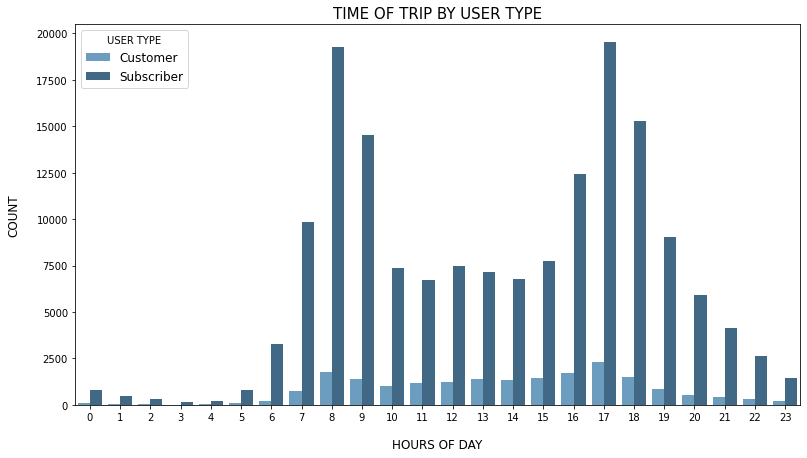

In [43]:
#figure12

plt.subplots(figsize = (13,7))

sb.countplot(data=fordgobike_copy,
             x='trip_hour',
             hue='user_type',
             palette="Blues_d")

#Using predefined functions to format title,labels
plotformat('TIME OF TRIP BY USER TYPE', 'HOURS OF DAY', 'COUNT')

plt.legend(title='USER TYPE',loc='upper left',prop={"size":12});

> __Subscribers' use of the bikes is clearly during peak hours, when people are going to work in the morning between 7:00 - 9:00 AM and coming home in the afternoon 4:00 - 6:00, indicating that they utilize the service to get to work. Customers prefer to bike in the afternoons or evenings.__

## <a id='multivariate'>Multivariate Exploration</a>


> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

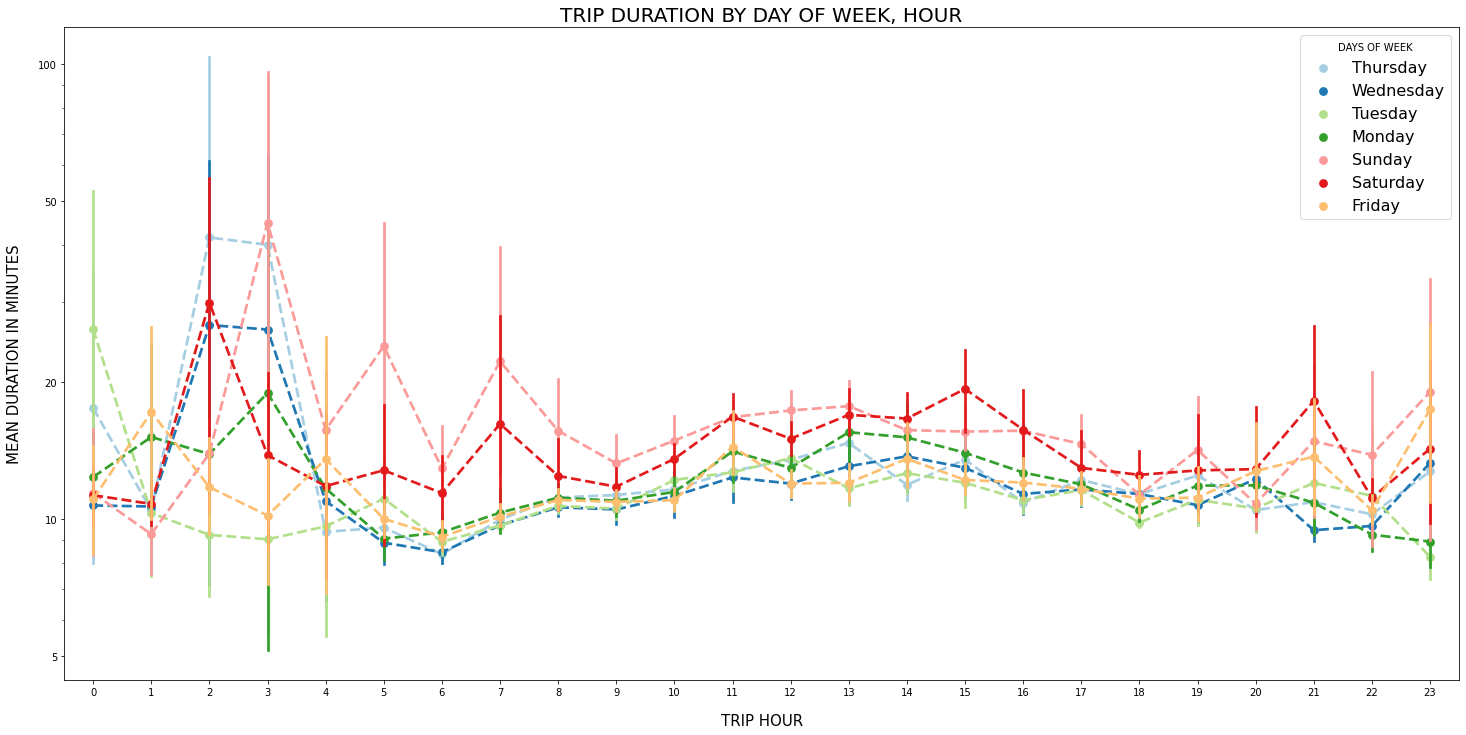

In [44]:
#figure13

plt.subplots(figsize = (25,12))

sb.pointplot(data = fordgobike_copy,
             x = 'trip_hour', y = 'trip_duration_minute', hue = 'day_of_week',
             palette = 'Paired', 
             linestyles = '--',
             linewidth=2)

#Using predefined functions to format title,labels
plotformat('TRIP DURATION BY DAY OF WEEK, HOUR', 'TRIP HOUR','MEAN DURATION IN MINUTES',20,15)

plt.legend(title='DAYS OF WEEK',loc='upper right',prop={"size":16})

plt.yscale('log')

plt.yticks([5, 10, 20, 50, 100], [5, 10, 20, 50, 100]);

> __It may be gathered from the plot that people take much shorter or faster trips than on weekends. Weekends (Saturdays and Sundays) appear to have a higher trend line.__

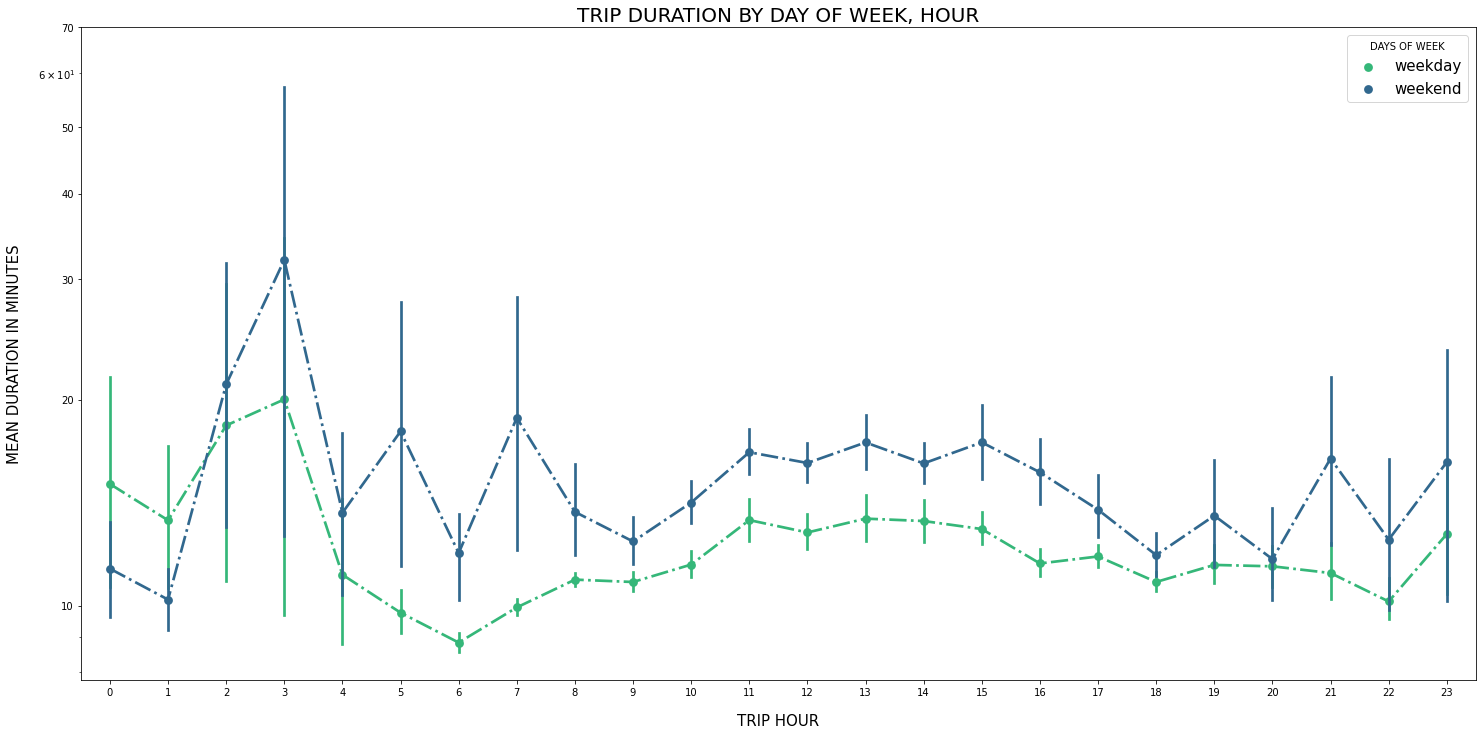

In [45]:
#figure14

plt.subplots(figsize = (25,12))

sb.pointplot(data = fordgobike_copy,
             x = 'trip_hour', y = 'trip_duration_minute', hue = 'weekday_or_weekend',
             palette = 'viridis_r', 
             linestyles = '-.',
             linewidth=2)

#Using predefined functions to format title,labels
plotformat('TRIP DURATION BY DAY OF WEEK, HOUR', 'TRIP HOUR','MEAN DURATION IN MINUTES',20,15)

plt.legend(title='DAYS OF WEEK',loc='best',prop = {'size' : 15})

plt.yscale('log')

plt.yticks([10, 20, 30, 40, 50, 70], [10, 20, 30, 40, 50, 70]);

> __Weekend trips are much more trending than weekdays trip.__

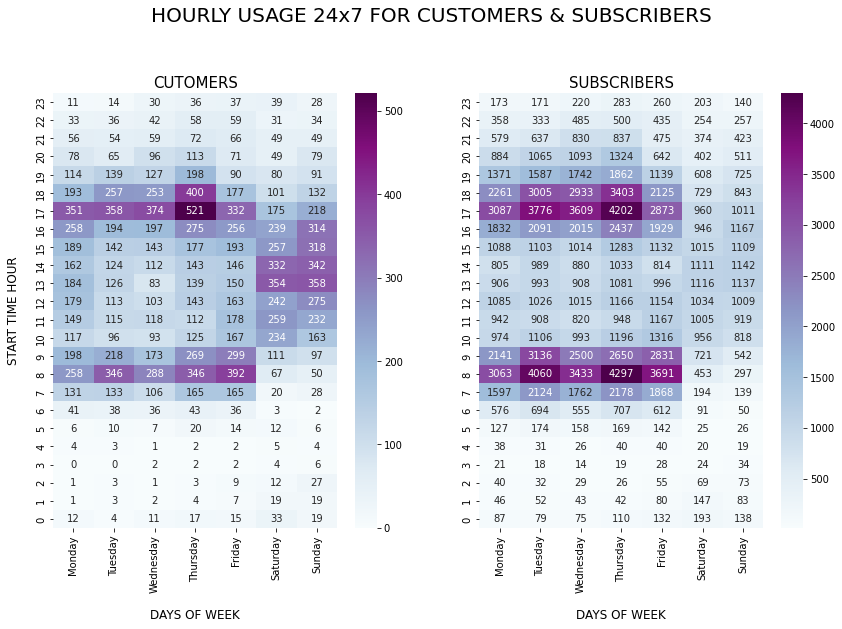

In [46]:
#figure15

# Setting the weekday order
fordgobike_copy['day_of_week'] = pd.Categorical(fordgobike_copy['day_of_week'], 
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'], 
                                        ordered=True)

plt.figure(figsize=(14,8))
plt.suptitle('HOURLY USAGE 24x7 FOR CUSTOMERS & SUBSCRIBERS', fontsize=20, y=1.03)

# heatmap for customers
plt.subplot(1, 2, 1)

df_customer = fordgobike_copy.query('user_type == "Customer"').groupby(["trip_hour", "day_of_week"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("trip_hour", "day_of_week", "bike_id")
sb.heatmap(df_customer,
           cmap="BuPu",
           fmt='g',
           annot=True)

plt.ylim(0,24)

#Using predefined functions to format title,labels
plotformat('CUTOMERS', 'DAYS OF WEEK', 'START TIME HOUR')

# heatmap for subscribers
plt.subplot(1, 2, 2)

df_subscriber = fordgobike_copy.query('user_type == "Subscriber"').groupby(["trip_hour", "day_of_week"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("trip_hour", "day_of_week", "bike_id")
sb.heatmap(df_subscriber,
           cmap="BuPu",
           fmt='g',
           annot=True)

plt.ylim(0,24)

#Using predefined functions to format title,labels
plotformat('SUBSCRIBERS', 'DAYS OF WEEK', '');


> - Distinct user types have different usage patterns (in terms of the number of rides). Subscribers make the majority of their trips on weekdays between the hours of 7-9 a.m. (peak at 8 a.m.) and 4-6 p.m. (peak at 5 p.m.), which are normal commute hours for going to work/school and returning home after work/school. 
> - For customers, the hours of 8 a.m. to 6 p.m. are the most popular. Customers' bike utilization has two peaks: one at 5 p.m. and another at 8 a.m., which is substantially lower than the 5 p.m. high. Customers' usage patterns are very consistent during the week, while weekend usage is higher.

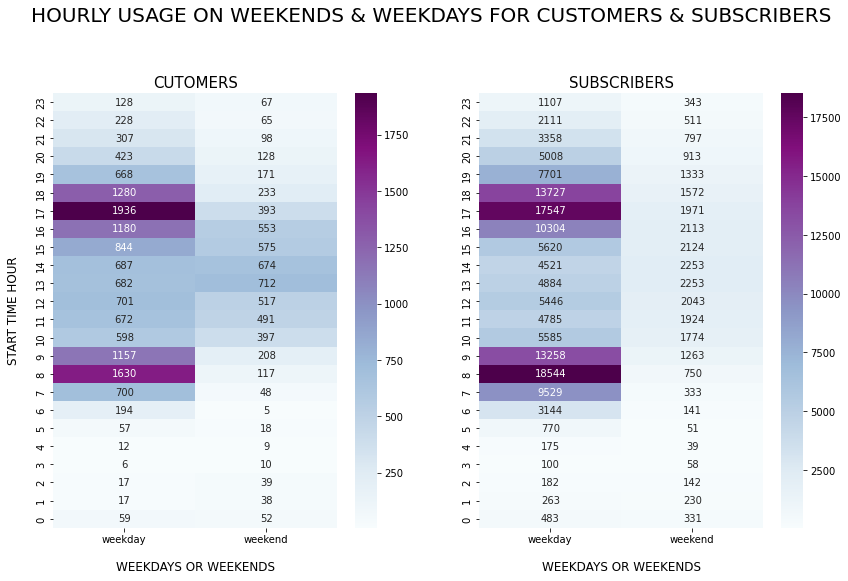

In [47]:
#figure16

plt.figure(figsize=(14,8))

plt.suptitle('HOURLY USAGE ON WEEKENDS & WEEKDAYS FOR CUSTOMERS & SUBSCRIBERS', fontsize=20, y=1.03)

# heatmap for customers
plt.subplot(1, 2, 1)

df_customer = fordgobike_copy.query('user_type == "Customer"').groupby(["trip_hour", "weekday_or_weekend"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("trip_hour", "weekday_or_weekend", "bike_id")
sb.heatmap(df_customer,
           cmap="BuPu",
           fmt='g',
           annot=True)

plt.ylim(0,24)

#Using predefined functions to format title,labels
plotformat('CUTOMERS', 'WEEKDAYS OR WEEKENDS', 'START TIME HOUR')

# heatmap for subscribers
plt.subplot(1, 2, 2)

df_subscriber = fordgobike_copy.query('user_type == "Subscriber"').groupby(["trip_hour", "weekday_or_weekend"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("trip_hour", "weekday_or_weekend", "bike_id")
sb.heatmap(df_subscriber,
           cmap="BuPu",
           fmt='g',
           annot=True)

plt.ylim(0,24) 

#Using predefined functions to format title,labels
plotformat('SUBSCRIBERS', 'WEEKDAYS OR WEEKENDS', '');

> __Between 8-9 AM and 4-7 PM for customers and 7-9 AM and 4-7 PM for subscribers, weekdays are significantly busy for both types of users.__

C:\Users\nihar\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\nihar\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


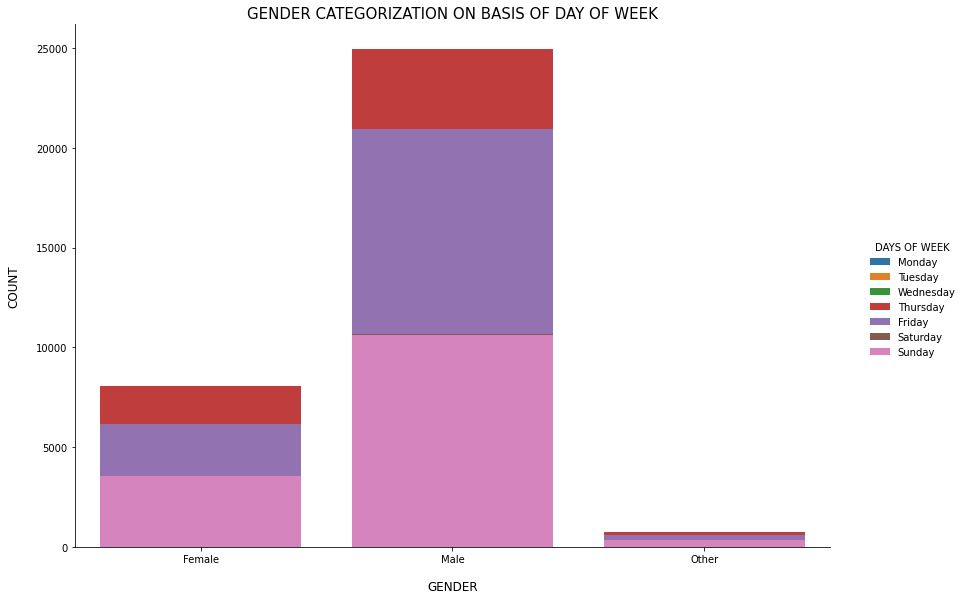

In [48]:
#figure17

g=sb.FacetGrid(data=fordgobike_copy,
               hue='day_of_week',
               margin_titles=True,
               size=8,
               aspect=1.5)

g=g.map(sb.countplot, 'member_gender')

#Using predefined functions to format title,labels
plotformat('GENDER CATEGORIZATION ON BASIS OF DAY OF WEEK', 'GENDER', 'COUNT')

g.add_legend(title='DAYS OF WEEK');

> ## <a id= 'conclusion'>Conclusions</a>
We have the following observations regarding the data as a consequence of our investigation using the Ford GoBike System data:
> - The most popular day for bike trips has been Thursday, followed by Tuesday and Wednesday. We also noticed that the days with the fewest bike rides were Sundays and Saturdays, with nearly equal numbers of rides!
> - Males have been the most favoured motorcyclists of the 'Ford GoBike' with 74.59 shares, compared to female bikers.
> - According to previous study, male has more bike rides than female and other gender, although average length of other (gender type) has more rides in both user kinds, according to the above research.
> - The majority of bike riders begin their journeys between the hours of 8:00 a.m. and 5:00 p.m., indicating that the majority of riders utilize this service for work or college.
> - Subscribers make up the majority of persons who use the bike trips for employment or college. This is understandable because these Subscribers would enjoy certain advantages that would aid them in their daily commutes.
> - People that use bike trips prefer not to use bike-sharing services.
> - Customers, or those who have not yet subscribed to the GoBike service, appear to use the service primarily on weekends and evenings, which might be for recreational purposes.

In [49]:
# Use this command if you are running this file in local
!jupyter nbconvert exploration_data_visualization_fordgobike_2019.ipynb --to html

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook exploration_data_visualization_fordgobike_2019.ipynb to html
[NbConvertApp] Writing 1290229 bytes to exploration_data_visualization_fordgobike_2019.html
